# Selenium Basic 1
- https://www.selenium.dev/documentation/
- https://selenium-python.readthedocs.io/index.html

## 1. Selenium Webdriver 사용하기

In [51]:
from selenium import webdriver
# from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService

service = ChromeService(executable_path="../driver/chromedriver")
driver = webdriver.Chrome(service=service)

driver.get("https://pinkwink.kr")

In [8]:
driver.quit()

In [12]:
# 화면 최대 크기 설정
driver.maximize_window()

In [11]:
# 화면 최소 크기 설정
driver.minimize_window()

In [13]:
# 화면 크기 설정
driver.set_window_size(600, 600)

In [15]:
# 새로 고침 
driver.refresh()

In [24]:
# 뒤로 가기 
driver.back()

In [17]:
# 앞으로 가기
driver.forward()

In [25]:
# 요소 찾기
from selenium.webdriver.common.by import By

# 클릭
first_content = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-masonry > div > ul > li:nth-child(1)')
first_content.click()

In [35]:
# 새로운 탭 생성하기
driver.execute_script('window.open("https://www.naver.com")')

In [48]:
# 탭 이동
driver.switch_to.window(driver.window_handles[0])

In [36]:
len(driver.window_handles)

4

In [44]:
# 탭 닫기
driver.close()

In [50]:
# 전체 탭 종료 
driver.quit()

# 2. 화면 스크롤

In [52]:
# 스크롤 가능한 높이(길이)
# 자바스크립트 코드 실행 
driver.execute_script('return document.body.scrollHeight')

5567

In [53]:
# 화면 스크롤 하단 이용
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [54]:
# 현재 보이는 화면 스크린샷 저장
driver.save_screenshot('./last_height.png')

True

In [61]:
# 화면 스크롤 상단 이동
driver.execute_script('window.scrollTo(0,0);')

In [62]:
# 특정 태그 지점까지 스크롤 이동
from selenium.webdriver import ActionChains

some_tag = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-list > div > ul > li:nth-child(3)')
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

In [63]:
driver.quit()

## 3. 검색어 입력

In [64]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [66]:
from selenium.webdriver.chrome.service import Service as ChromeService

service = ChromeService(executable_path="../driver/chromedriver")
driver = webdriver.Chrome(service=service)

driver.get('https://www.naver.com')

In [75]:
keyword = driver.find_element(By.CSS_SELECTOR, '#query')
keyword.clear()
keyword.send_keys('딥러닝')

In [76]:
search_btn = driver.find_element(By.CSS_SELECTOR, '#sform > fieldset > button')
search_btn.click()

- XPATH

```
'//' : 최상위
'*' : 자손 태그
'/' : 자식 태그
'div[1] : div 중에서 1번째 태그 
    
    ex) //*[@id="sform"]/section[2]/div/div[2]/fieldset/button'
```

In [77]:
driver.find_element(By.XPATH, '//*[@id="query"]').send_keys('xpath')


In [79]:
driver.find_element(By.XPATH, '//*[@id="sform"]/fieldset/button').click()

In [80]:
driver.quit()

---

In [81]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [84]:
from selenium.webdriver.chrome.service import Service as ChromeService

service = ChromeService(executable_path="../driver/chromedriver")
driver = webdriver.Chrome(service=service)

driver.get('https://pinkwink.kr')

In [94]:
# 1. 돋보기 버튼을 선택
from selenium.webdriver import ActionChains

search_tag = driver.find_element(By.CSS_SELECTOR, '.search')
action = ActionChains(driver)
action.click(search_tag)
action.perform()

In [95]:
# 2. 검색어를 입력
driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > input[type=text]').send_keys('딥러닝')

In [96]:
# 3. 검색 버튼 클릭 
driver.find_element(By.CSS_SELECTOR,'#header > div.search.on > button').click()

## 4. Selenium + BeautifulSoup 

In [97]:
# 현재 화면의 html 코드 가져오기 
driver.page_source

'<html lang="ko"><head>\n                <script src="https://partner.googleadservices.com/gampad/cookie.js?domain=pinkwink.kr&amp;callback=_gfp_s_&amp;client=ca-pub-2982459700139266&amp;cookie=ID%3D3a2e01bd0fe98c81-2217140153e20083%3AT%3D1689237740%3ART%3D1689238090%3AS%3DALNI_Mbqwfv5K7bNkG7DXY1HxqMokOT34Q&amp;gpic=UID%3D00000c206ab30462%3AT%3D1689237740%3ART%3D1689238090%3AS%3DALNI_MZo0QpkwtUuIZkDvBlZsMGXxU-Hxw"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202307100101/show_ads_impl_fy2021.js" id="google_shimpl"></script><script src="https://t1.kakaocdn.net/malibu_prod/wpm.js" async=""></script><script type="text/javascript">if (!window.T) { window.T = {} }\nwindow.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":371175,"name":"pinkwink","title":"PinkWink","isDormancy":false},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"https://www.tisto

In [98]:
from bs4 import BeautifulSoup

req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')

In [100]:
soup.select('.post-item')

[<div class="post-item">
 <a href="/1427">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/mZyxa/btskllcT9gn/RncR5K8s9eJ03JkKaexNaK/img.png"/>
 </span>
 <span class="title">영상 인식에 필요한 기초 기법 간편 정리 - ArUCo Marker, YOLO 등</span>
 <span class="date">2023. 6. 19. 09:11</span>
 <span class="excerpt">이번에는 로봇에서 영상인식, 혹은 간단한 프로젝트에서 영상을 인식하는 부분에 대해 간단히 정리해서 유투브에 올렸습니다. 여러가지를 모두 다루면 좋겠지만, 윈도우 환경에서 설명을 했고, OpenCV 기초, ArUCo Marker 이야기, YOLO, YOLO를 위한 라벨링 작업등을 초~간단하게 설명했습니다. 먼저 아래 링크는 영상 전체의 재생목록입니다. https://www.youtube.com/playlist?list=PL83j7f4UkozEKBsOgKNEy79w5ClNMtxSF 영상 인식에 필요한 기법 간편 정리 이번에는 로봇에서 영상인식, 혹은 간단한 프로젝트에서 영상을 인식하는 부분에 대해 간단히 정리해서 유투브에 올렸습니다. 여러가지를 모두 다루면 좋겠지만, 윈도우 환경에서 설명을 했고, www.y..</span>
 </a>
 </div>,
 <div class="post-item">
 <a href="/1426">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/bpcaLp/btsjlEE1g6j/ytddI9gaz4lkPBsz6A5RVK/img.png"/>
 </span>
 <span clas

In [101]:
contents = soup.select('.post-item')
len(contents)

8

In [102]:
contents[2]

<div class="post-item">
<a href="/1423">
<span class="thum">
<img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/b2u9XJ/btsgpYNip1p/4ArmaU8DKLL6EkhVlXMn2K/img.png"/>
</span>
<span class="title">핑크랩이 진행한 H Mobility 해커톤 대회 이야기</span>
<span class="date">2023. 5. 18. 17:44</span>
<span class="excerpt">작년 11월에 저희 핑크랩이 현대자동차의 H-Mobility 해커톤 대회를 진행하게 되었다고 하고, 첫 행사를 진행한 후 글을 올렸었습니다. 그리고 애초 계약했던 두 번째 행사를 지난 주 주말, 5월 13일 14일에 진행해서 이제 전체 진행을 마쳤습니다. 대회의 주제 자체는 지난번 글에서 다루어서 아래 글을 보시고, 오늘은 저와 저희 팀 - 핑크랩의 이야기를 해보려고 합니다. 해커톤을 어떻게 준비해 갔는지를 이야기를 해볼까 합니다. https://pinkwink.kr/1400 22년 11월 H-Mobility Robotics 해커톤 대회를 마쳤습니다 얼마전에 저희 핑크랩이 현대 H 모빌리티 로보틱스 해커톤 대회를 연다고 했었는데요. https://pinkwink.kr/1397 핑크랩이 H-Mobility..</span>
</a>
</div>

In [103]:
driver.quit()

## 2. 셀프 주유소가 정말 저렴하나요 ? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [105]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService

In [111]:
# 페이지 접근
url = "https://www.opinet.co.kr/searRgSelect.do"
service = ChromeService(executable_path="../driver/chromedriver") # ../driver/chromedriver.exe
driver = webdriver.Chrome(service=service)

driver.get(url)

In [107]:
driver.get(url)

- 문제
    - 1. 해당 URL로 한번에 접근이 안됩니다.
    - 2. 메인 페이지로 접속되고, 팝업창이 하나 나옵니다.

In [ ]:
import time

def main_get():
    # 페이지 접근
    url = "https://www.opinet.co.kr/searRgSelect.do"
    service = ChromeService(executable_path="../driver/chromedriver") # ../driver/chromedriver.exe
    driver = webdriver.Chrome(service=service)
    driver.get(url)
    time.sleep(3)
    # 팝업창으로 전환
    driver.switch_to_window(drive.window_handles[-1])
    # 팝업창 닫아주기
    driver.close()
    time.sleep(3)
    # 메인화면 창으로 전환
    driver.switch_to_window(drive.window_handles[-1])
    # 접근 URL 다시 요청
    driver.get(url)

In [ ]:
main_get()

In [ ]:
# driver.close()

In [115]:
# 지역 : 시/도

sido_list_raw = driver.find_element(By.ID, 'SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              전북\n             \n            \n             \n             \n              

In [122]:
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')
len(sido_list), sido_list[17].text


(18, '강원')

In [123]:
sido_list[1].get_attribute("value")

'서울특별시'

In [124]:
# 방법 1 
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute("value"))

sido_names
    

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '강원특별자치도']

In [127]:
# 방법 2
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [128]:
# 공백 '' 슬라이싱 
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '강원특별자치도']

In [129]:
sido_names[0]

'서울특별시'

In [133]:
# 키값 바꿔주기 
sido_list_raw.send_keys(sido_names[0])

In [145]:
# 구
gu_list_raw = driver.find_element(By.ID, 'SIGUNGU_NM0') # 부모 태그
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option') # 자식 태그

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [146]:
gu_list_raw.send_keys(gu_names[15])

In [147]:
# 엑셀 저장 
driver.find_element(By.CSS_SELECTOR, ' #glopopd_excel > span').click()

In [148]:
driver.find_element(By.XPATH,'//*[@id="glopopd_excel"]/span').click()

In [149]:
element_get_excel = driver.find_element(By.ID, 'glopopd_excel')
element_get_excel.click()

In [150]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)

    element_get_excel = driver.find_element(By.XPATH,'//*[@id="glopopd_excel"]/span').click()
    time.sleep(3)

/var/folders/93/7k3h7y912r908nn6zty4dmrr0000gn/T/ipykernel_1139/3703531616.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [151]:
driver.close()

## 4. 데이터 정리하기

In [152]:
import pandas as pd
from glob import glob

In [154]:
# 파일 목록 한번에 가져오기
glob("../data/지역_*.xls")

['../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (11).xls']

In [155]:
# 파일명 저장
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (4).xls']

In [156]:
#하나만 읽어보기 
tmp = pd.read_excel(stations_files[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
14,서울특별시,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),현대오일뱅크,02-998-9704,Y,-,1635,1455,1400
15,서울특별시,HD현대오일뱅크㈜직영 영신주유소,서울 도봉구 방학로 151,현대오일뱅크,02-956-5152,N,2044,1637,1477,1579


In [157]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [158]:
tmp_raw

[       지역                   상호                    주소      상표          전화번호  \
 0   서울특별시          이케이에너지 주식회사  서울 도봉구 도봉로 941 (도봉동)  현대오일뱅크  02-3494-3641   
 1   서울특별시       지에스칼텍스㈜ 방학동주유소        서울 도봉구 방학로 186   GS칼텍스  02-3493-5189   
 2   서울특별시       (주)자연에너지 햇살주유소  서울 도봉구 방학로 142 (방학동)  현대오일뱅크   02-954-4555   
 3   서울특별시            삼미북부셀프주유소  서울 도봉구 도봉로 437 (쌍문동)   SK에너지   02-992-5561   
 4   서울특별시        지에스칼텍스㈜ 도봉주유소  서울 도봉구 도봉로 895 (도봉동)   GS칼텍스   02-954-0118   
 5   서울특별시  (주)헨지스에너지 구도일주유소 도봉  서울 도봉구 도봉로 706 (방학동)   S-OIL  02-3491-3454   
 6   서울특별시      도봉제일주유소(주)송만에너지  서울 도봉구 도봉로 783 (도봉동)  현대오일뱅크   02-955-5185   
 7   서울특별시       한이에너지(주) 쌍문주유소  서울 도봉구 도봉로 547 (쌍문동)   S-OIL   02-992-0220   
 8   서울특별시        극동유화(주) 대안주유소   서울 도봉구 마들로 574 (창동)   S-OIL   02-996-6640   
 9   서울특별시           구도일주유소 파크빌  서울 도봉구 해등로3길 86 (창동)   S-OIL   02-906-5104   
 10  서울특별시        동일석유(주) 창동주유소  서울 도봉구  도봉로 434 (창동)   SK에너지   02-902-5544   
 11  서울특별시               노원교주유소  서울 도봉구 마들로 776 (도봉동

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [163]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),현대오일뱅크,02-3494-3641,Y,-,1521,1335,-
1,서울특별시,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,GS칼텍스,02-3493-5189,Y,1789,1539,1359,1225
2,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-954-4555,Y,1790,1539,1359,-
3,서울특별시,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1539,1359,1400
4,서울특별시,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),GS칼텍스,02-954-0118,Y,1789,1539,1359,1210
...,...,...,...,...,...,...,...,...,...,...
4,서울특별시,HD현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),현대오일뱅크,02-832-7926,Y,1819,1612,1419,-
5,서울특별시,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),GS칼텍스,02-532-0606,Y,1814,1614,1509,-
6,서울특별시,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),현대오일뱅크,02-817-9179,N,1869,1629,1529,-
7,서울특별시,매일주유소,서울 동작구 상도로 139 (상도동),S-OIL,02-817-4085,Y,-,1629,1529,1800


In [164]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      443 non-null    object
 1   상호      443 non-null    object
 2   주소      443 non-null    object
 3   상표      443 non-null    object
 4   전화번호    443 non-null    object
 5   셀프여부    443 non-null    object
 6   고급휘발유   443 non-null    object
 7   휘발유     443 non-null    object
 8   경유      443 non-null    object
 9   실내등유    443 non-null    object
dtypes: object(10)
memory usage: 38.1+ KB


In [166]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [170]:
stations = pd.DataFrame({
    '상호' : stations_raw['상호'],
    '주소' : stations_raw['주소'],
    '가격' : stations_raw['휘발유'],
    '셀프' : stations_raw['셀프여부'],
    '상표' : stations_raw['상표'],  
})

stations.head()

,상호,주소,가격,셀프,상표
0,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1521,Y,현대오일뱅크
1,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1539,Y,GS칼텍스
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1539,Y,현대오일뱅크
3,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1539,Y,SK에너지
4,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1539,Y,GS칼텍스


In [175]:
for eachAddress in stations["주소"]:
    print(eachAddress.split()[1])

도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
광진구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
중랑구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
관악구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
노원구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
강서구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
종로구
종로구
종로구
종로구
종로구
종로구
종로구
종로구
종로구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구

In [176]:
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations

,상호,주소,가격,셀프,상표,구
0,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1521,Y,현대오일뱅크,도봉구
1,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1539,Y,GS칼텍스,도봉구
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1539,Y,현대오일뱅크,도봉구
3,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1539,Y,SK에너지,도봉구
4,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1539,Y,GS칼텍스,도봉구
...,...,...,...,...,...,...
4,HD현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),1612,Y,현대오일뱅크,동작구
5,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1614,Y,GS칼텍스,동작구
6,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1629,N,현대오일뱅크,동작구
7,매일주유소,서울 동작구 상도로 139 (상도동),1629,Y,S-OIL,동작구


In [181]:
stations['구'].unique(), len(stations['구'].unique())

(array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
        '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
        '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object),
 25)

In [182]:
# 가격 데이터형 변환 object > float 

statios['가격'] = stations['가격'].astype('float') # 에러이유 > 가격정보 빈 곳('-')이 있음

ValueError: could not convert string to float: '-'

In [185]:
# 가격 정보 없는 주유소
stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구
26,영등포현대셀프주유소,서울 영등포구 경인로 822 (영등포동),-,Y,현대오일뱅크,영등포구
22,신동방주유소,서울 성북구 월계로 84 (장위동),-,Y,S-OIL,성북구


In [186]:
# 가격 정보만 있는 주유소 사용
stations = stations[stations['가격'] != '-']
stations.tail()

,상호,주소,가격,셀프,상표,구
4,HD현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),1612,Y,현대오일뱅크,동작구
5,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1614,Y,GS칼텍스,동작구
6,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1629,N,현대오일뱅크,동작구
7,매일주유소,서울 동작구 상도로 139 (상도동),1629,Y,S-OIL,동작구
8,살피재주유소,서울 동작구 상도로 334,1765,N,SK에너지,동작구


In [188]:
stations['가격'] = stations['가격'].astype('float') 

/var/folders/93/7k3h7y912r908nn6zty4dmrr0000gn/T/ipykernel_1139/3930744501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = stations['가격'].astype('float')


In [189]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      441 non-null    object 
 1   주소      441 non-null    object 
 2   가격      441 non-null    float64
 3   셀프      441 non-null    object 
 4   상표      441 non-null    object 
 5   구       441 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.1+ KB


In [190]:
stations

,상호,주소,가격,셀프,상표,구
0,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1521.0,Y,현대오일뱅크,도봉구
1,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1539.0,Y,GS칼텍스,도봉구
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1539.0,Y,현대오일뱅크,도봉구
3,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1539.0,Y,SK에너지,도봉구
4,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1539.0,Y,GS칼텍스,도봉구
...,...,...,...,...,...,...
4,HD현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),1612.0,Y,현대오일뱅크,동작구
5,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1614.0,Y,GS칼텍스,동작구
6,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1629.0,N,현대오일뱅크,동작구
7,매일주유소,서울 동작구 상도로 139 (상도동),1629.0,Y,S-OIL,동작구


In [191]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
436,4,HD현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),1612.0,Y,현대오일뱅크,동작구
437,5,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1614.0,Y,GS칼텍스,동작구
438,6,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1629.0,N,현대오일뱅크,동작구
439,7,매일주유소,서울 동작구 상도로 139 (상도동),1629.0,Y,S-OIL,동작구
440,8,살피재주유소,서울 동작구 상도로 334,1765.0,N,SK에너지,동작구


In [192]:
stations.head()

,index,상호,주소,가격,셀프,상표,구
0,0,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1521.0,Y,현대오일뱅크,도봉구
1,1,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1539.0,Y,GS칼텍스,도봉구
2,2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1539.0,Y,현대오일뱅크,도봉구
3,3,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1539.0,Y,SK에너지,도봉구
4,4,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1539.0,Y,GS칼텍스,도봉구


In [193]:
del stations['index']
stations.head()

,상호,주소,가격,셀프,상표,구
0,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1521.0,Y,현대오일뱅크,도봉구
1,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1539.0,Y,GS칼텍스,도봉구
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1539.0,Y,현대오일뱅크,도봉구
3,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1539.0,Y,SK에너지,도봉구
4,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1539.0,Y,GS칼텍스,도봉구


In [194]:
stations.tail()

,상호,주소,가격,셀프,상표,구
436,HD현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),1612.0,Y,현대오일뱅크,동작구
437,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1614.0,Y,GS칼텍스,동작구
438,HD현대오일뱅크㈜직영 동작주유소,서울 동작구 상도로 403 (상도동),1629.0,N,현대오일뱅크,동작구
439,매일주유소,서울 동작구 상도로 139 (상도동),1629.0,Y,S-OIL,동작구
440,살피재주유소,서울 동작구 상도로 334,1765.0,N,SK에너지,동작구


## 5. 주유 가격 정보 시각화

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns 
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")

path = "C://Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc('font', family="Arial Unicode MS")
elif platform.sys() == "Windows":
    font_name = font_manager.Fontproperties(fname = path). get_name()
    rc("font", family, font_name)
else:
    print("Unknown system. Sorry")

<Axes: title={'center': '가격'}, xlabel='셀프'>

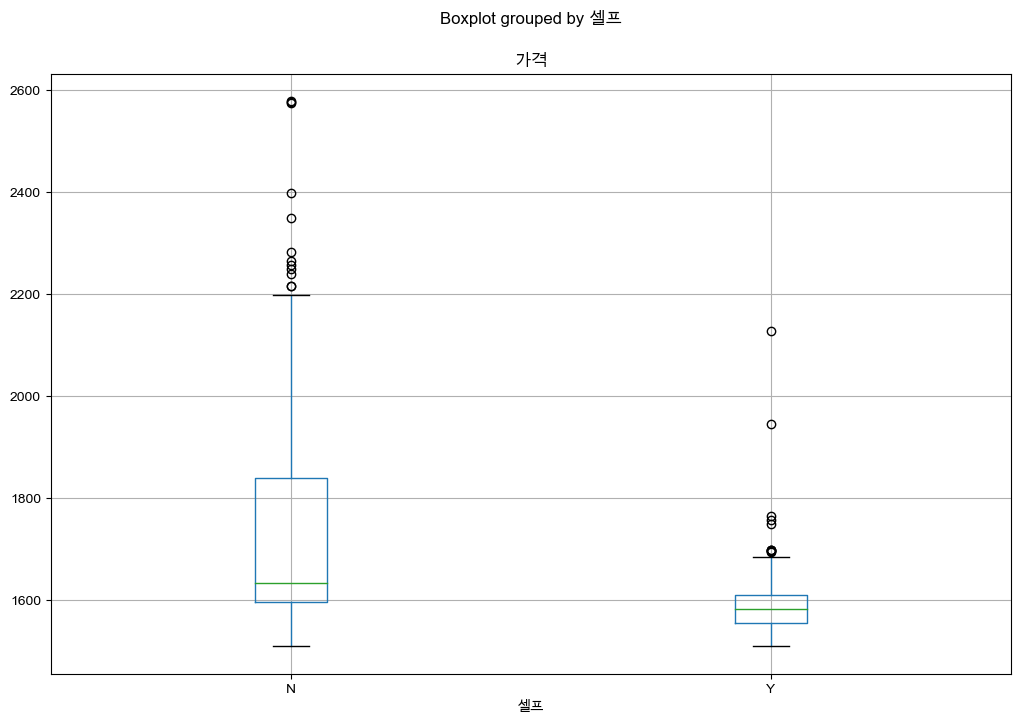

In [198]:
# boxplot(feat. pandas)

stations.boxplot(column="가격",by='셀프',figsize=(12, 8))

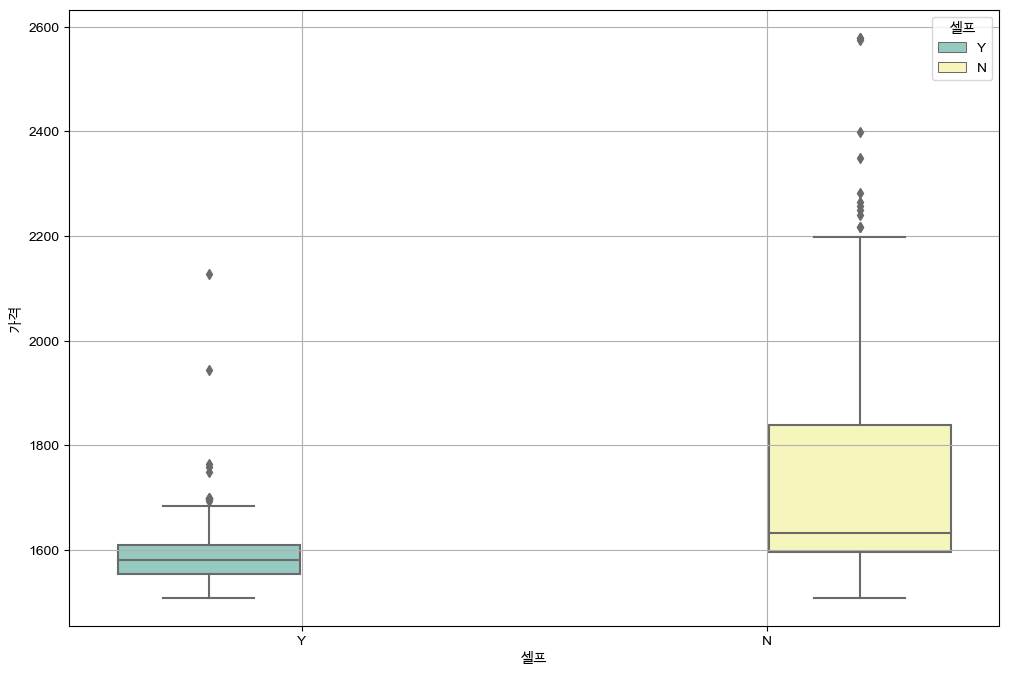

In [206]:
# Boxplot (feat.seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x='셀프', y='가격', hue = '셀프', data=stations, palette='Set3')
plt.grid(True)
plt.show()

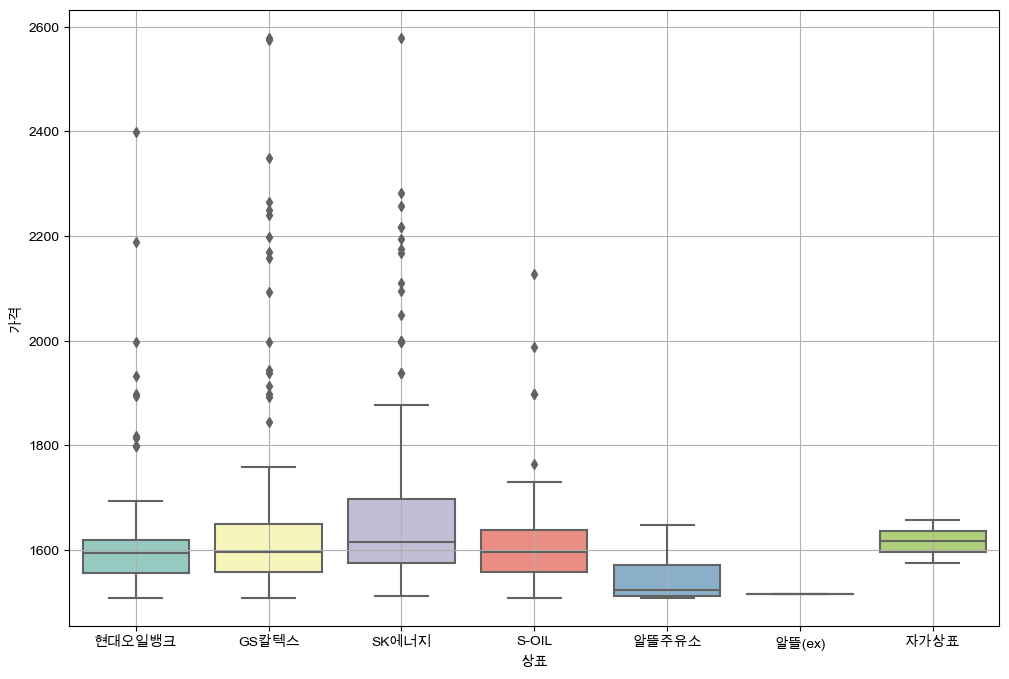

In [205]:
# boxplot(feat.seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
plt.grid(True)
plt.show()

In [ ]:
# 지도 시각화

In [207]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [208]:
# 가장 비싼 주유소 10개
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
218,서남주유소,서울 중구 통일로 30,2579.0,N,SK에너지,중구
400,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
268,서계주유소,서울 용산구 청파로 367 (청파동),2575.0,N,GS칼텍스,용산구
399,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
217,필동주유소,서울 중구 퇴계로 196 (필동2가),2349.0,N,GS칼텍스,중구
398,SK논현주유소,서울 강남구 논현로 747 (논현동),2283.0,N,SK에너지,강남구
216,약수주유소,서울 중구 다산로 173,2266.0,N,GS칼텍스,중구
397,갤러리아주유소,서울 강남구 압구정로 426,2257.0,N,SK에너지,강남구
162,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2250.0,N,GS칼텍스,종로구
161,경복궁주유소,서울 종로구 율곡로 6 (중학동),2240.0,N,GS칼텍스,종로구


In [209]:
# 가장 값싼 주유소 10개
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
97,화곡역주유소,서울 강서구 강서로 154 (화곡동),1509.0,Y,알뜰주유소,강서구
99,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1509.0,Y,현대오일뱅크,강서구
130,현대주유소,서울 양천구 남부순환로 372 (신월동),1509.0,Y,S-OIL,양천구
131,플라트(주)서호주유소,서울 양천구 남부순환로 317,1509.0,Y,GS칼텍스,양천구
98,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1509.0,N,알뜰주유소,강서구
412,(주)한미석유구로그린주유소,서울 구로구 구로중앙로 76 (구로동),1512.0,Y,GS칼텍스,구로구
100,목화주유소,서울 강서구 국회대로 251 (화곡동),1512.0,Y,알뜰주유소,강서구
132,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1512.0,N,SK에너지,양천구
133,양천구주유소,서울 양천구 국회대로 275 (목동),1512.0,Y,알뜰주유소,양천구
220,영등포제일셀프주유소,서울 영등포구 가마산로 379,1513.0,Y,현대오일뱅크,영등포구


In [211]:
import numpy as np
gu_data = pd.pivot_table(data=stations, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1844.558824
강동구,1654.785714
강북구,1558.333333
강서구,1599.606061
관악구,1624.571429


In [215]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data = geo_str,
    data = gu_data,
    columns = [gu_data.index, '가격'],
    key_on = "feature.id",
    fill_color = "PuRd"
)
my_map